In [1]:
# import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# data visualization setting

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [12]:
# load the data

cars = pd.read_csv('datasets/toyota.csv')

In [13]:
# overview of data

print(cars.head())
print(cars.info())
print(cars.describe())

   model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0   GT86  2016  16000       Manual    24089   Petrol  265  36.2         2.0
1   GT86  2017  15995       Manual    18615   Petrol  145  36.2         2.0
2   GT86  2015  13998       Manual    27469   Petrol  265  36.2         2.0
3   GT86  2017  18998       Manual    14736   Petrol  150  36.2         2.0
4   GT86  2017  17498       Manual    36284   Petrol  145  36.2         2.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   eng

In [14]:
# inspect for missing values

cars.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

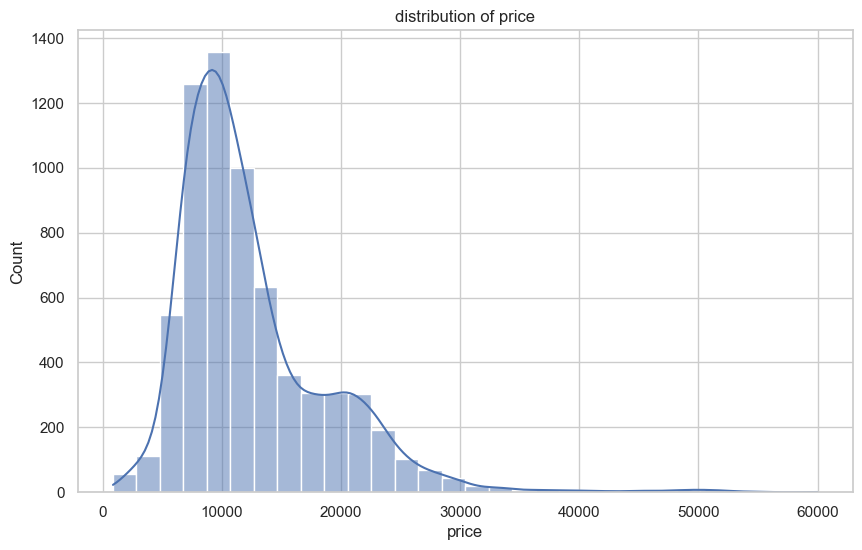

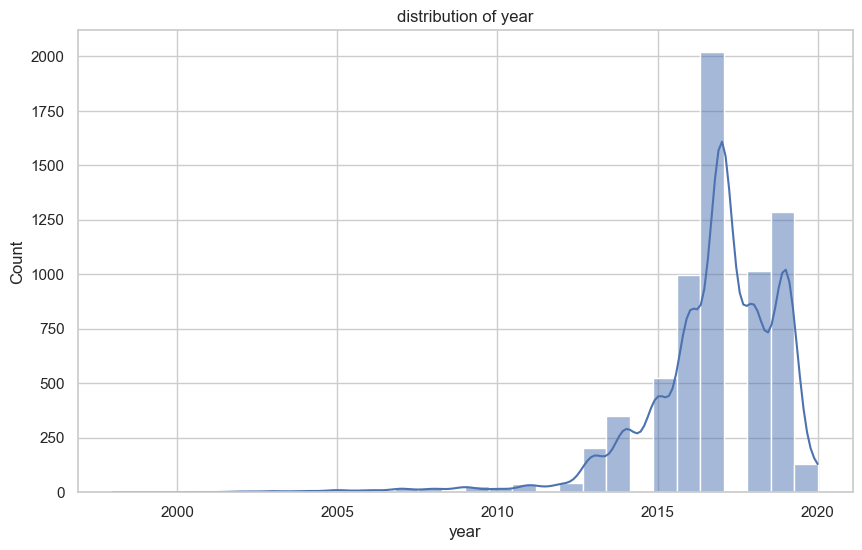

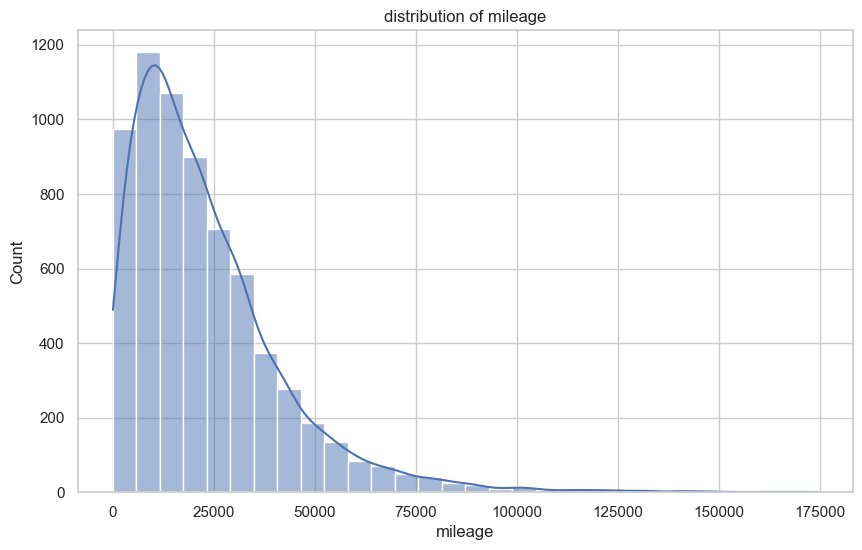

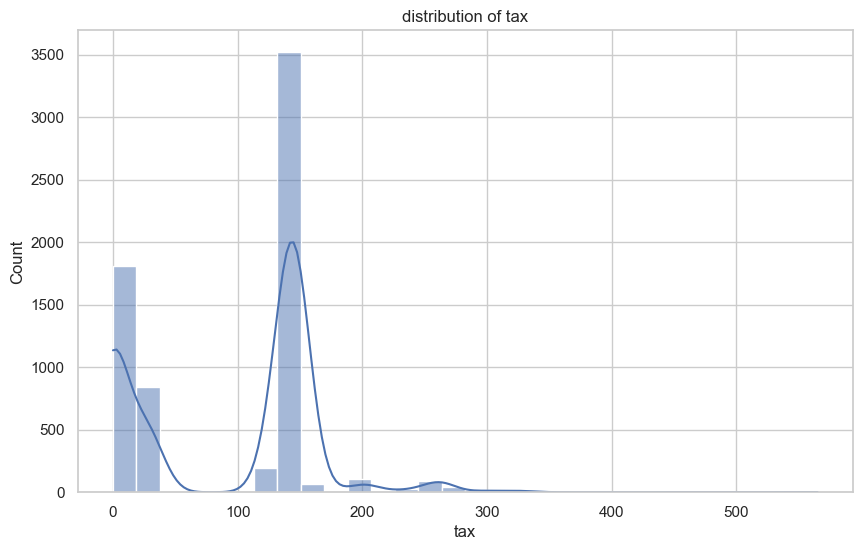

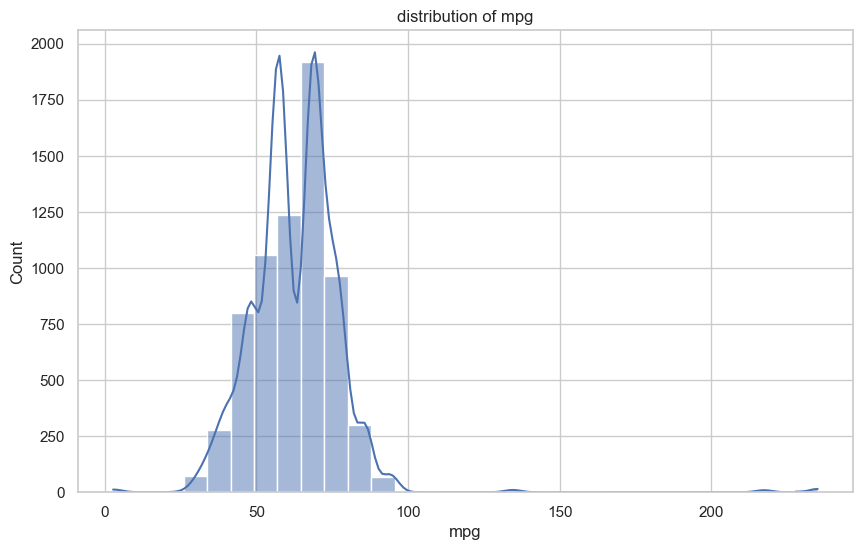

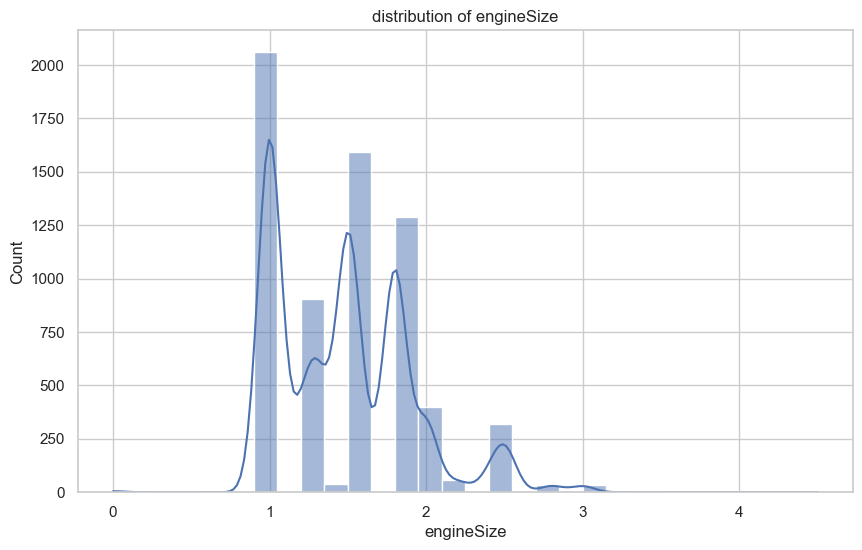

In [16]:
# univariate distributions (histograms)

num_cols = ['price', 'year', 'mileage', 'tax', 'mpg', 'engineSize']
for col in num_cols:
    sns.histplot(cars[col], kde=True, bins=30)
    plt.title(f'distribution of {col}')
    plt.show()

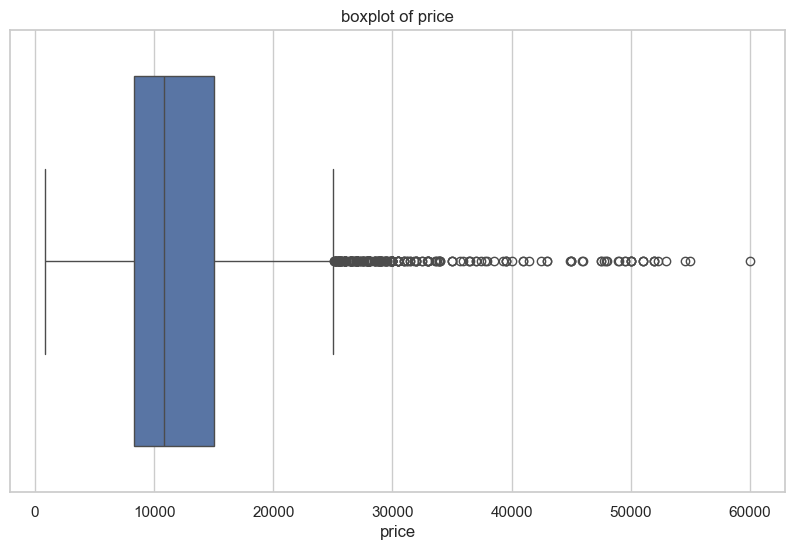

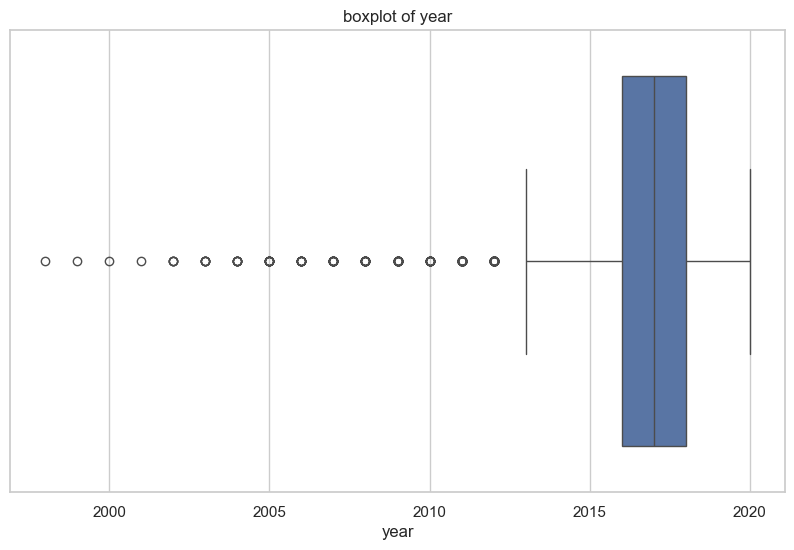

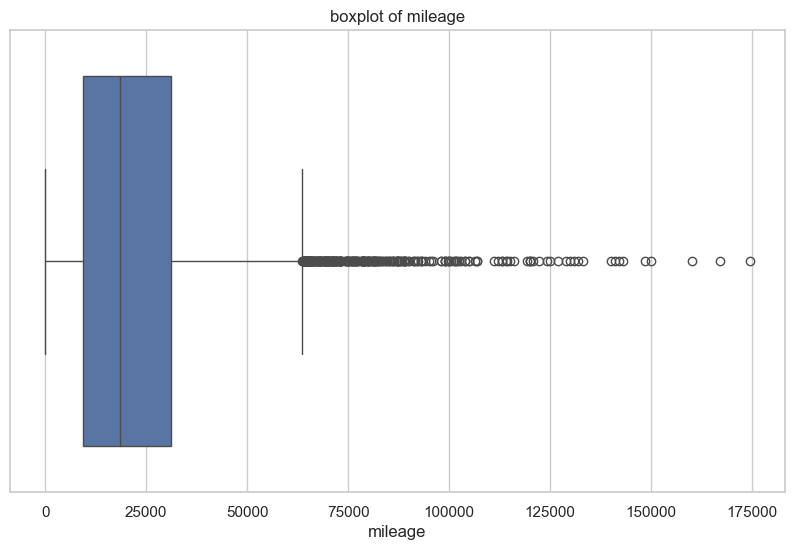

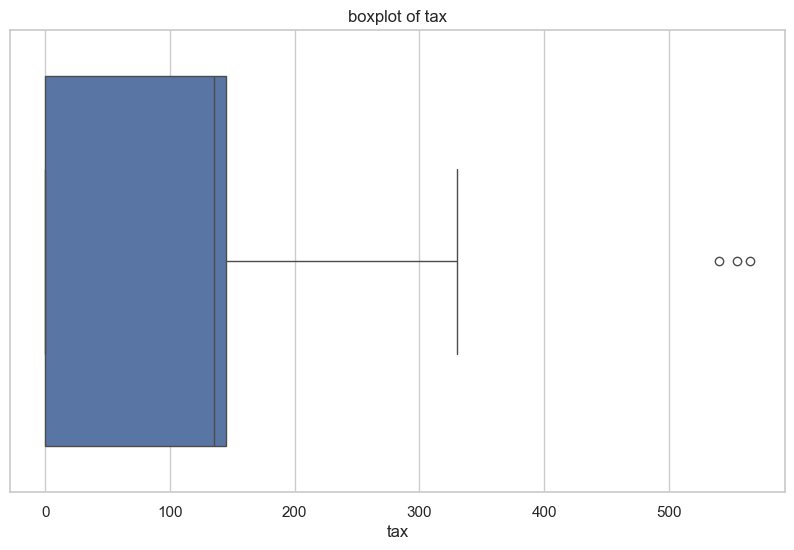

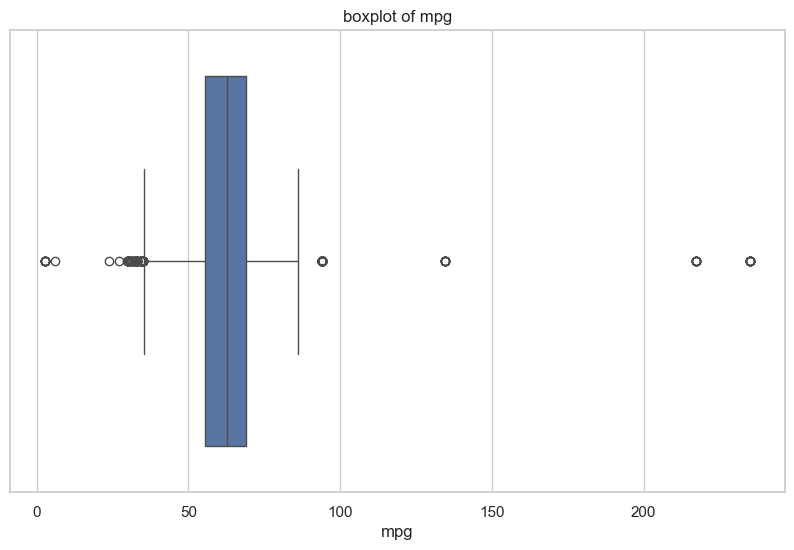

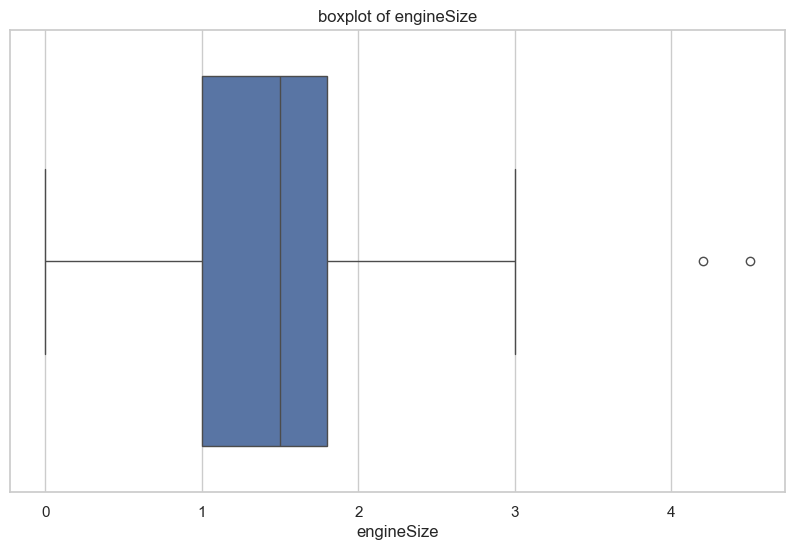

In [18]:
# boxplot to detect outliers

for col in num_cols:
    sns.boxplot(x=cars[col])
    plt.title(f'boxplot of {col}')
    plt.show()

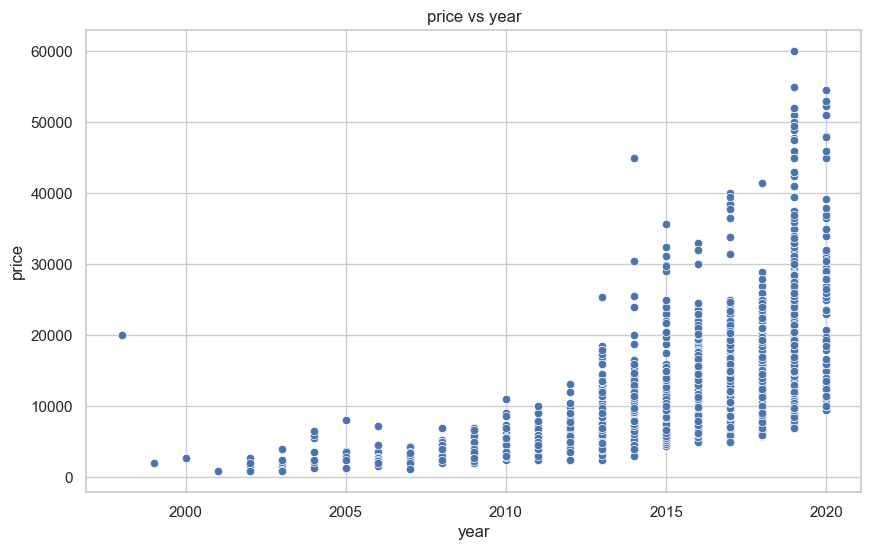

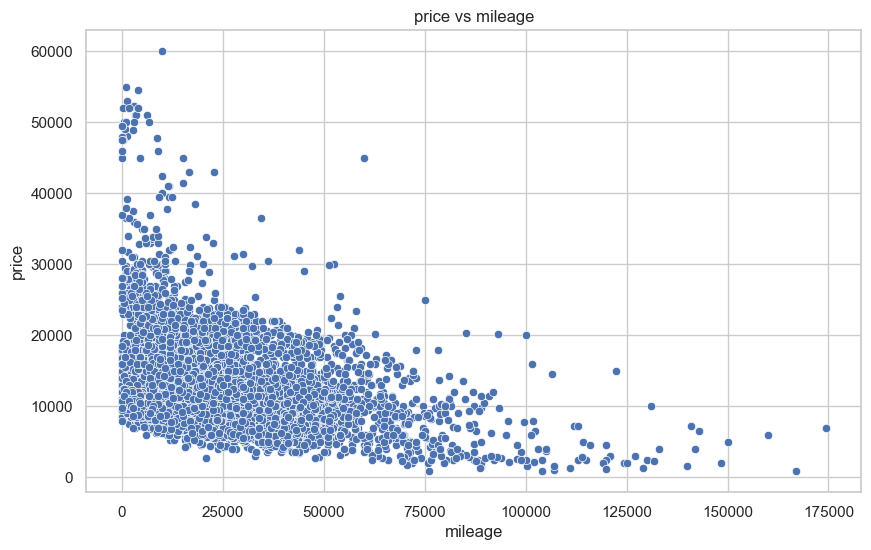

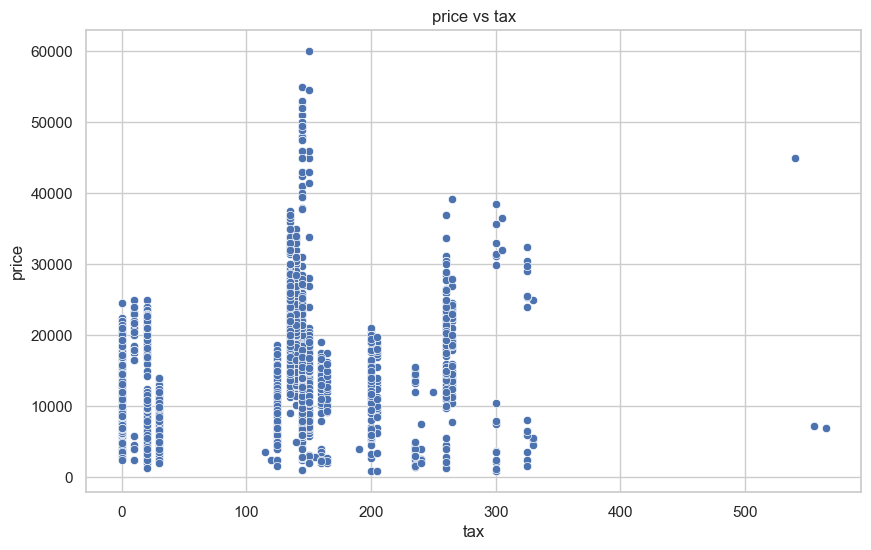

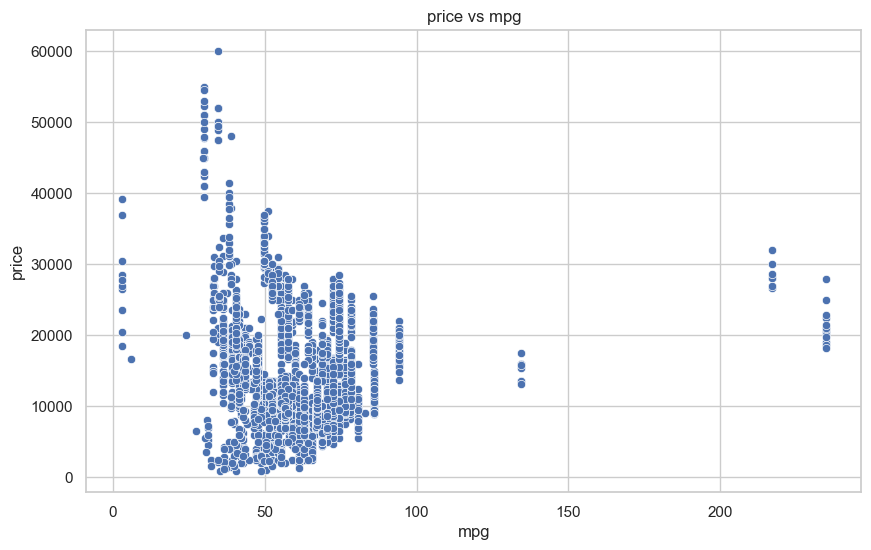

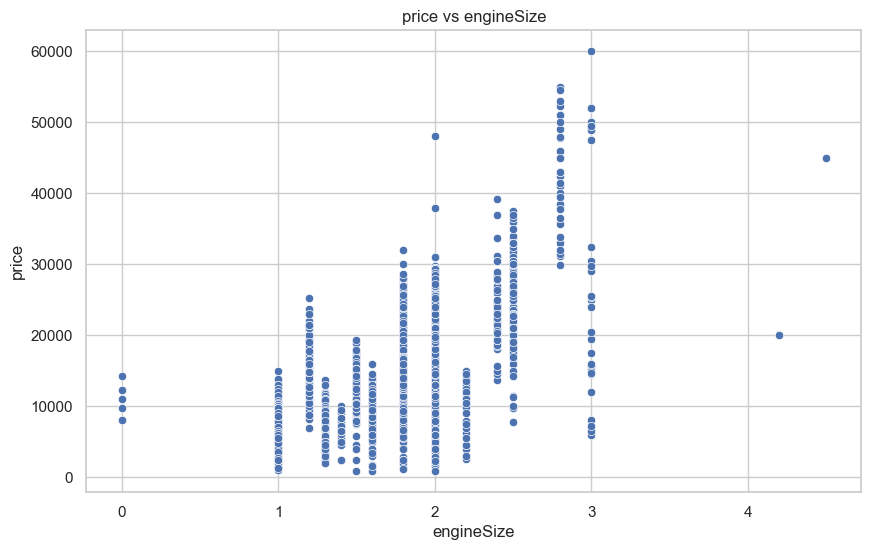

In [19]:
# bivariate relationships(scatterplots) => how the features relate to price

for col in ['year', 'mileage', 'tax', 'mpg', 'engineSize']:
    sns.scatterplot(x=cars[col], y=cars['price'])
    plt.title(f'price vs {col}')
    plt.show()

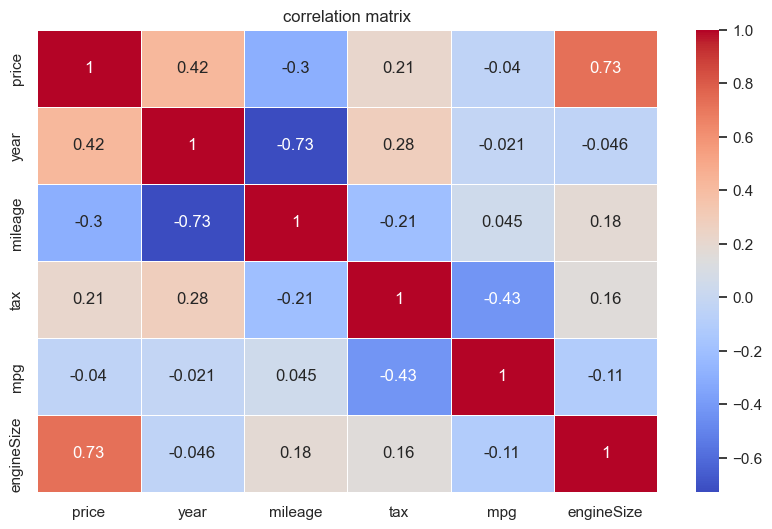

In [21]:
# correlation heatmap

corr = cars[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('correlation matrix')
plt.show()

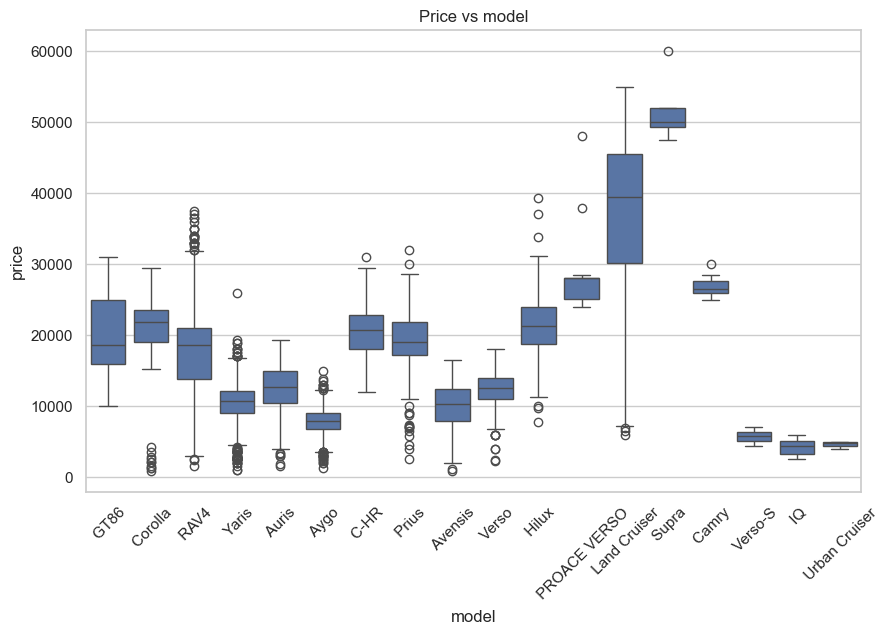

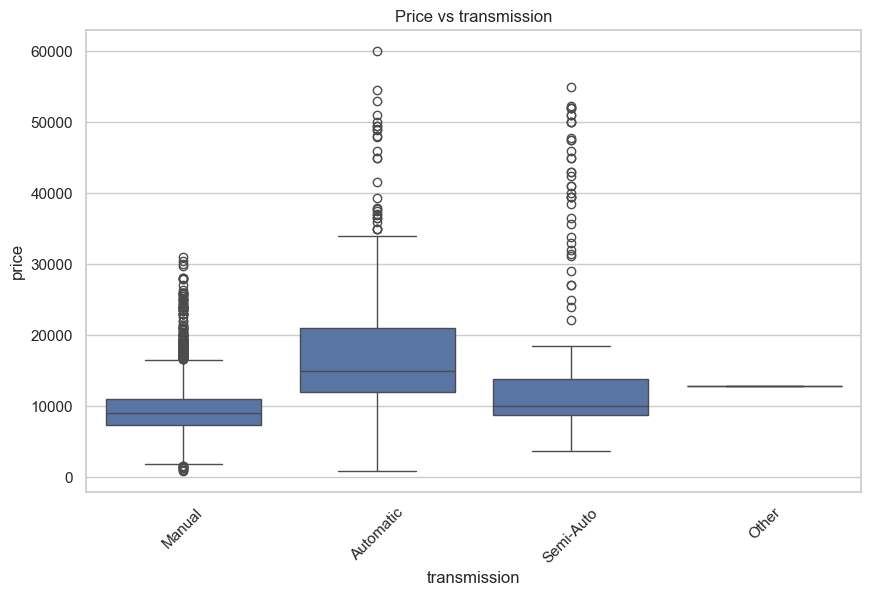

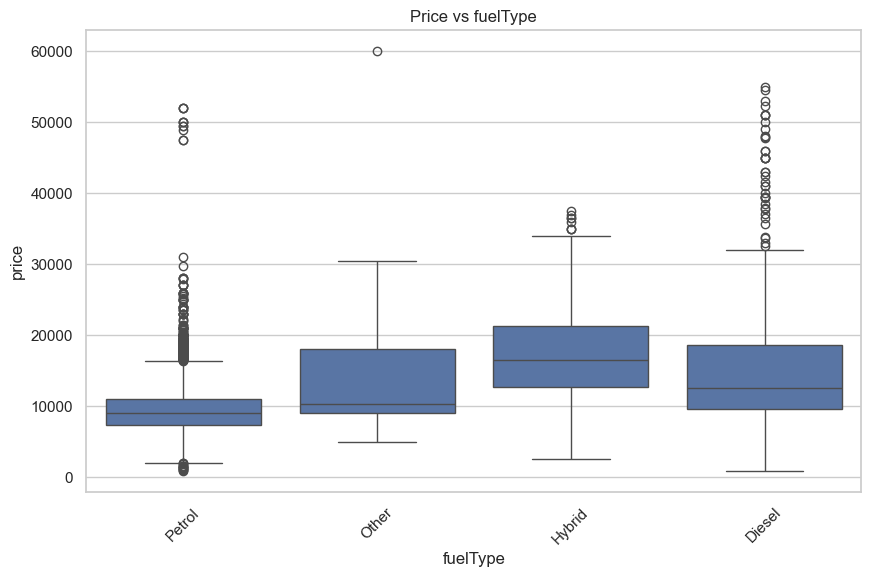

In [22]:
# categorical cols vs price (boxplot)

for col in ['model', 'transmission', 'fuelType']:
    sns.boxplot(x=cars[col], y=cars['price'])
    plt.title(f'Price vs {col}')
    plt.xticks(rotation=45)
    plt.show()

In [15]:
# seperate features and target variables

X = cars.drop(columns=["price"])
y = cars["price"]

In [8]:
cat_feat = ["transmission", "fuelType"]

In [50]:
# encode categorical data

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

columntransformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_feat),
        ('model_ordinal', OrdinalEncoder(), ['model'])],
    remainder='passthrough'
)

In [51]:
# make pipeline

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

pipeline = Pipeline(steps=[
    ('preprocessor', columntransformer),
    ('model', LinearRegression())
])

In [52]:
# split the data into trainig set and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
# fit the training set into the pipeline

pipeline.fit(X_train, y_train)

/Users/veraezeagu/PycharmProjects/linear-regression/.venv/lib/python3.11/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['model', 'transmission',
                                                   'fuelType']),
                                                 ('model_ordinal',
                                                  OrdinalEncoder(),
                                                  ['model'])])),
                ('model', LinearRegression())])

In [54]:
# predict the target
y_pred = pipeline.predict(X_test)
y_pred

/Users/veraezeagu/PycharmProjects/linear-regression/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


array([25266.81383595,  2061.0002162 , 12209.85383646, ...,
        8072.29467554, 11468.04493146, 12087.63040812], shape=(2022,))

In [55]:
# check for model accuracy

from sklearn.metrics import r2_score

r2_score = r2_score(y_test, y_pred)
print(r2_score)

0.9272327451102576
